# Tarea 3 - Reticulados


## Código de Honor
Me comprometo a hacer esta tarea por mi cuenta y por mis propios medios:



In [3]:
firma = 'Maximiliano Ruz'
print(firma)

Maximiliano Ruz


Completar este programa para determinar las fuerzas y reacciones en un
reticulado segun lo visto en clases. La tarea sera evaluada con un
reticulado arbitrario.

Bonus: se premiara con 0.3 puntos del curso al que incorpore en su codigo alguna
forma de mostrar los resultados en un grafico. Puede ser distintos colores, o con numeros.
Queda a discreción del profesor la cantidad del puntaje asignado, segun la calidad del gráfico.


**SE LOGRÓ! (VER ULTIMA PARTE DEL CÓDIGO)**

In [4]:
!git clone https://github.com/fsahli/TareaReticulado

fatal: destination path 'TareaReticulado' already exists and is not an empty directory.


In [5]:
%load_ext autoreload
%autoreload 2
from TareaReticulado.Truss import * # Importa el modulo con las funciones
filename='TareaReticulado/truss-hyper.in'; #nombre del archivo con la informacion del reticulado

In [6]:
tr=Truss(filename)

[[0.  0. ]
 [1.  0. ]
 [2.  0. ]
 [0.5 1. ]
 [1.5 1. ]]
[[0 1]
 [1 2]
 [0 3]
 [3 1]
 [1 4]
 [4 2]
 [3 4]]
[[0 1 0]
 [0 0 1]
 [2 1 0]
 [2 0 1]]
[[   3.    0. -500.]
 [   4.    0. -500.]]


Se genera un objeto `Truss`, que tiene los siguientes atributos:

- `tr.nodes [nro de nodos,2]`: tiene la posicion X,Y de cada nodo en el mismo
orden en que fueron especificados en el archivo.
- `tr.bars [nro de barras,2]`: contiene el numero de cada nodo que esta
presente en la barra
- `tr.reac [nro de reacciones, 3]`: en la primera columna tiene los nodos en los
que esta aplicada la reaccion. La 2da y 3ra corresponden a un vector
unitario especificando la direccion de la reaccion. El número de nodo en que está aplicada la fuerza puede venir en `float`. Hay que convertirlo a `int` para usarlo como índice: `i = int(f)`.
- `tr.force [nro de fuerzas,3]`: en la primera columna tiene los nodos en los
que esta aplicada la fuerza. La 2da y 3ra corresponden a un vector
especificando la fuerza. Ojo!! El número de nodo en que está aplicada la fuerza puede venir en `float`. Hay que convertirlo a `int` para usarlo como índice: `i = int(f)`.

Además cuenta con las funciones:

- `tr.plot`: dibuja el reticulado. En negro se grafican las restricciones
en rojo las fuerzas. Los vectores estan dibujados de manera que siempre apuntan al nodo.
- `tr.X(i,j)` retorna el coeficiente X.
- `tr.Y(i,j)` retorna el coeficiente Y.

[0.]
[0.]


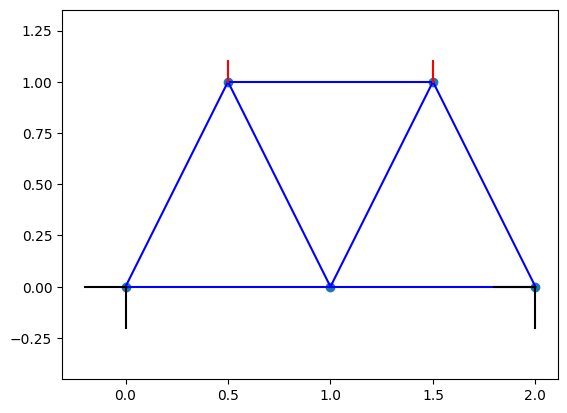

In [7]:
tr.plot()

## Caso hiperestático

Utilizando el codigo desarrollado del reticula isoestático, genere un programa que
calcule la posicion desformada de un reticulado cualquiera, especificado
en un archivo con la estructura de prueba.in.

Por simplicidad solo se considerarán reacciones en el sistema coordenado
x-y. Ej: [1 0] o [0 1]. Considere además que el reticulado puede ser hiperestatico.

Como guia considere que debe generar la matriz `A` y la matriz `k`. Luego
resolver `A*km*A'*dx=f`, considerando que hay algunas ecuaciones que no
pueden ser resueltas directamente.

_dx_ : delta x 

Considere para las barras un modulo elastico E=200 GPa y que son cilindricas
con un radio de 5 mm.

Como resultado genere un vector `R` que contenga el resultado de las
reacciones desconocidas en el mismo orden con el que fueron planteadas,
un vector `F` con todas las fuerzas de las barras en orden 
un vector `DX` con los desplazamientos de todos los nodos (incluidos los que son cero), 
respetando el orden en
que fueron planteados. Para escribir los resultados utilize la función
`tr.write_results(DX,R,F,'output.txt')`

In [17]:
tr=Truss(filename);

A=np.zeros((2*len(tr.nodes),len(tr.bars)))    # A es de la forma (# fuerzas en x + # fuerzas en y) x (# barras [una fuerza por cada barra])

f=np.zeros(2*len(tr.nodes))   # vector f contiene el resultado de  K * dx (con K: matriz de rigidez global = -At k A, y dx: delta x)

km=np.zeros((len(tr.bars),len(tr.bars)))  # Matriz de rigidez local (creo que se llama asi)

E=200E9;  # Modulo de Young para todas las barras
area=5e-3**2*np.pi;  # Todas las barras tienen igual area

nb=len(tr.bars)  # Cantidad de barras

[[0.  0. ]
 [1.  0. ]
 [2.  0. ]
 [0.5 1. ]
 [1.5 1. ]]
[[0 1]
 [1 2]
 [0 3]
 [3 1]
 [1 4]
 [4 2]
 [3 4]]
[[0 1 0]
 [0 0 1]
 [2 1 0]
 [2 0 1]]
[[   3.    0. -500.]
 [   4.    0. -500.]]


In [18]:
print("\nNodos (x, y):\n", tr.nodes,"\n" )
print("Barras (i, j):\n", tr.bars,"\n")
print("Reacciones (nodo, x, y):\n", tr.reac,"\n")
print("Fuerzas externas (nodo, x, y):\n", tr.force,"\n")


Nodos (x, y):
 [[0.  0. ]
 [1.  0. ]
 [2.  0. ]
 [0.5 1. ]
 [1.5 1. ]] 

Barras (i, j):
 [[0 1]
 [1 2]
 [0 3]
 [3 1]
 [1 4]
 [4 2]
 [3 4]] 

Reacciones (nodo, x, y):
 [[0 1 0]
 [0 0 1]
 [2 1 0]
 [2 0 1]] 

Fuerzas externas (nodo, x, y):
 [[   3.    0. -500.]
 [   4.    0. -500.]] 



In [31]:
# Aqui va su desarrollo.

def show_matrix(A):     #QUITAR?  AFASDFASDFASDF

  print()
  for row in A:
    lista = []
    
    for element in row:

      lista.append(element)

    string = ''.join(f'{round(x,2):3} ' for x in lista)

    print(string)



# Generar la matriz A:    PUEDE QUE EXISTA UN ERROR AL GENERAR LA MATRIZ

#----------------------------------------------------------------

# Codigo del profesor Sahli

for k, bar in enumerate(tr.bars):
  i = bar[0]
  j = bar[1]

  A[2*i, k] = tr.X(j, i)
  A[2*i+1, k] = tr.Y(j, i)
  A[2*j, k] = tr.X(i, j)
  A[2*j+1, k] = tr.Y(i, j)
#----------------------------------------------------------------

#show_matrix(A)


# Generar la matriz de rigidez km:

#----------------------------------------------------------------

# Funcion calcula la rigidez de cada barra:

def get_stiffness(tr: Truss, coordinates: list) -> float:

  i = coordinates[0]
  j = coordinates[1]

  lenght = (np.sqrt((tr.nodes[i,0] - tr.nodes[j,0]) ** 2 + (tr.nodes[i, 1] - tr.nodes[j,1]) ** 2))  # Linea de codigo sacada del metodo X, de la clase Truss y alterada
  
  stiffness = (E * area) / lenght

  return stiffness


for k, bar in enumerate(tr.bars):

  km[k , k] = get_stiffness(tr, bar)

show_matrix(km)

#----------------------------------------------------------------




15707963.27 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 15707963.27 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 14049629.46 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 14049629.46 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 14049629.46 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 14049629.46 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 15707963.27 


In [10]:
tr.print_results(DX,R,F)
tr.plot_deformed(DX,1000)

NameError: name 'DX' is not defined

Hints:
- En `numpy`, si es que uno cuenta con un arreglo `A` de NxN y quiere obtener las filas especificadas en una lista `idx_f = [1, 2, 5]`, se puede hacer escribiendo `A[idx_f,:]`. De la misma manera si es que uno quisiera obtener las columnas `idx_c = [3, 4, 6]`, se escribe `A[:, idx_c]`. Finalmente si es que uno quiere obtener una sub-matriz de las filas y columnas especificadas en `idx_f` y `idx_c`, se logra con `A[np.array(idx_f)[:,None], np.array(idx_c)]`.
- Se pueden borrar elementos de una lista `a = [0, 1, 2, 3, 4]` simplemente con el comando `a.remove(x)` donde `x` es el elemento que uno quiere borrar, no la posición.
- `A.T` entrega el traspuesto del arreglo `A`.
- `A.dot(b)` corresponde a la multiplicación matricial. No use `A*b`.